#Student Name: Cormac Lavery
#Student ID: 16139658

In [1]:
import numpy as np
import pandas as pd
import re
from matplotlib.pylab import plt 
# indicate the output of plotting function is printed to the notebook
%matplotlib inline 

### Parameters
* SEED : Used as value for functions that take a random seed as an argument. The function of this parameter is to ensure repeatability between runs of the notebook
* TEST_SIZE : Used to determine the split of the dataset into a Test set and a Training Set. Needs to be specified as a float between 0.0 and 1.0

In [2]:
SEED = 1
TEST_SIZE = 0.3

### Dataset
Import the UCI Communities and Crimes dataset using Pandas
Details on the dataset is available at the following [link](http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data)

In [3]:
# Following code is from https://github.com/amclean3695/Communities-and-Crime/blob/master/Communities_and_Crime.ipynb
# TODO : See is there any other means for pulling column names from C45 file format
#Reads in names from textfile and performs regex to extract the attribute names 
textfile = open('communities.names','r')
filetext = textfile.read()
textfile.close()
matches = re.findall(r'-{2}\s(\w+)\:{1}', filetext)
col_names = matches[2:] #corresponds to the 128 attributes

In [4]:
df = pd.read_csv('communities.data', header=None, names=col_names)

#data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'
#df = pd.read_csv(data_url, header=None)
# The above code does not work as PythonAnywhere blocks outgoing connections for free accounts to non-whitelisted sites

#print(df.head(5))
#dir(df)
print(df.shape)
#print(df['ViolentCrimesPerPop'].value_counts())

(1994, 128)


### Remove Non-Predictive Attributes

Of the 128 attributes loaded, for this dataset it is stated that:

Attribute Information: (122 predictive, 5 non-predictive, 1 goal) 
* state: US state (by number) - not counted as predictive above, but if considered, should be consided nominal (nominal) 
* county: numeric code for county - not predictive, and many missing values (numeric) 
* community: numeric code for community - not predictive and many missing values (numeric) 
* communityname: community name - not predictive - for information only (string) 
* fold: fold number for non-random 10 fold cross validation, potentially useful for debugging, paired tests - not predictive (numeric) 

Therefore I will drop county, community, communityname and fold from the dataset and explore if state is a good predictor before deciding to retain or now. 

(1994, 124)


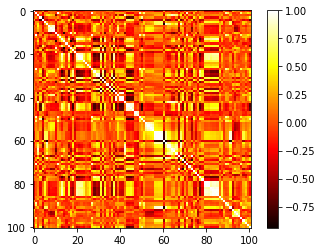

In [5]:
df = df.drop(['county', 'community', 'communityname', 'fold'], axis=1)
print(df.shape)

corr_mat = df.corr()
plt.imshow(corr_mat, cmap='hot')
plt.colorbar()
plt.show()

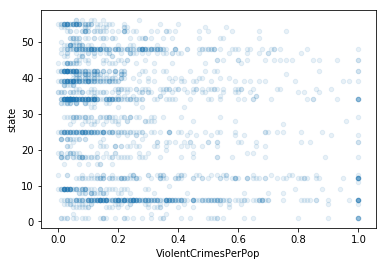

`State` is correlated with `Violent crime per capita` at: -0.2113975153956961 which makes it the 66th best correlation out of 100 considered in correlation matrix


In [6]:
df.plot(kind="scatter", x="ViolentCrimesPerPop", y="state", alpha=0.1)
plt.show()


correlation = df.corr()["ViolentCrimesPerPop"]
# I will now sort the correlations by absolute value so we can calculate 
# how goood a predictor state is compared with other attributes
correlation_absolute = abs(correlation).sort_values(ascending=False)
state_correlation = correlation["state"]
state_correlation_position = correlation_absolute.keys().get_loc('state')

print("`State` is correlated with `Violent crime per capita` at: {} which makes it the {}th best correlation out of {} considered in correlation matrix"
      .format(state_correlation,state_correlation_position+1,len(correlation)-1))

As we can see from the above cell I think that state should be considered as we can see from the scatterplot that some states appear to have a wider variance of violent crimes per population and that it is around the middle of the road as far as correlations go (there are predictors with lower correlations to the target value)

In [7]:
df.isnull().sum().sort_values(ascending=False).head()

ViolentCrimesPerPop    0
PctKids2Par            0
PctBSorMore            0
PctUnemployed          0
PctEmploy              0
dtype: int64

There are no cells with missing data
However, visually inspecting the data, there are cells with "?" and this needs to be replaced with "NaN" (Not a Number)

In [8]:
df = df.replace('?', np.nan)
print(df.columns[df.isnull().any()])

Index(['OtherPerCap', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps',
       'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop',
       'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol',
       'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian',
       'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz',
       'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
       'LemasGangUnitDeploy', 'PolicBudgPerPop'],
      dtype='object')


In [9]:
df.isnull().sum().sort_values(ascending=False).head(25)

LemasSwFTFieldPerPop    1675
LemasTotalReq           1675
PolicReqPerOffic        1675
PolicPerPop             1675
RacialMatchCommPol      1675
PctPolicWhite           1675
PctPolicBlack           1675
PctPolicHisp            1675
PctPolicAsian           1675
PctPolicMinor           1675
OfficAssgnDrugUnits     1675
NumKindsDrugsSeiz       1675
PolicAveOTWorked        1675
LemasSwFTFieldOps       1675
LemasSwFTPerPop         1675
LemasSwornFT            1675
PolicCars               1675
PolicOperBudg           1675
LemasPctPolicOnPatr     1675
LemasGangUnitDeploy     1675
PolicBudgPerPop         1675
LemasTotReqPerPop       1675
OtherPerCap                1
AsianPerCap                0
PctKids2Par                0
dtype: int64

In [10]:
for column in df:
    if(df[column].isnull().sum()>=(df.shape[0]/2)):
        print("Column ", column, df[column].isnull().sum())
        df = df.drop([column], axis=1)
print(df.shape)

Column  LemasSwornFT 1675
Column  LemasSwFTPerPop 1675
Column  LemasSwFTFieldOps 1675
Column  LemasSwFTFieldPerPop 1675
Column  LemasTotalReq 1675
Column  LemasTotReqPerPop 1675
Column  PolicReqPerOffic 1675
Column  PolicPerPop 1675
Column  RacialMatchCommPol 1675
Column  PctPolicWhite 1675
Column  PctPolicBlack 1675
Column  PctPolicHisp 1675
Column  PctPolicAsian 1675
Column  PctPolicMinor 1675
Column  OfficAssgnDrugUnits 1675
Column  NumKindsDrugsSeiz 1675
Column  PolicAveOTWorked 1675
Column  PolicCars 1675
Column  PolicOperBudg 1675
Column  LemasPctPolicOnPatr 1675
Column  LemasGangUnitDeploy 1675
Column  PolicBudgPerPop 1675
(1994, 102)


In [11]:
df.isnull().sum().sort_values(ascending=False).head(5)

OtherPerCap       1
PctOccupManu      0
HispPerCap        0
NumUnderPov       0
PctPopUnderPov    0
dtype: int64

There is only one missing value remaining but lets impute it for the craic using code from the DePy_Talk notebook

In [12]:
# Set to median
print(df['OtherPerCap'][130])
#print(df['OtherPerCap'].median())
#print(df['OtherPerCap'].mean())
dir(df['OtherPerCap'])
miss_median = df['OtherPerCap'].median()
df['OtherPerCap'][130] = miss_median
print(df['OtherPerCap'][130])

nan
0.25


/Users/cormaclavery/Development/pythonVirtualEnv/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


### Outlier Detection

Here we do some outlier detection. However this resulted in worse results when attempted so continued with the original dataset

In [13]:
# Store off original dataset without outlier detection and removal
dataset = df.values

# From DePy_Talk Notebook[1]
def find_outliers_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])
    
    return outlier_indices, outlier_values

tukey_indices, tukey_values = find_outliers_tukey(df['ViolentCrimesPerPop'])

print("Shape Before Outlier Removal")
print(df.shape)
print("Outliers = ",len(tukey_indices), "out of ",len(df['ViolentCrimesPerPop']), "in ViolentCrimesPerPop Column")
for i in range(len(tukey_indices)):
    df = df.drop([tukey_indices[i]], axis=0)
print("Shape After Outlier Removal")
print(df.shape)

# Store dataset with outlier
tukey_dataset = df.values

Shape Before Outlier Removal
(1994, 102)
Outliers =  110 out of  1994 in ViolentCrimesPerPop Column
Shape After Outlier Removal
(1884, 102)


### Split Up Dataset

In [14]:
print(dataset.shape)
X = dataset[:, 0:100]
y = dataset[:, 100]

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=SEED) 

(1994, 102)


### Scale the Dataset

I will now use the standard scaler to scale the dataset.

In [15]:
# Scale the dataset
from sklearn.preprocessing import StandardScaler 
# Scale the data with respect to the training data set 
scaler = StandardScaler() 
scaler.fit(X_train) 

X_scaled_train = scaler.transform(X_train) 
# Scaling the test set using the transform defined by the train set. 
X_scaled_test = scaler.transform(X_test) 

/Users/cormaclavery/Development/pythonVirtualEnv/tensorflow/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Ridge Model

This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm. Also known as Ridge Regression or Tikhonov regularization. This estimator has built-in support for multi-variate regression

Run regression using Ridge Model with [`alpha=0.5`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

The alpha of a ridge regression is the regularization strength; must be a positive float. Regularization improves the conditioning of the problem and reduces the variance of the estimates. Larger values specify stronger regularization

In [16]:
from sklearn import linear_model
clf = linear_model.Ridge(alpha=.5)
clf.fit(X_scaled_train, y_train)

# Determine accuracy using the train set
y_hat_train = clf.predict(X_scaled_train)


from sklearn.metrics import mean_absolute_error
print("MAE ", mean_absolute_error(y_train, y_hat_train))
from sklearn.metrics import mean_squared_error
print("MSE ", mean_squared_error(y_train, y_hat_train))
from sklearn.metrics import r2_score
print("R2S ", r2_score(y_train, y_hat_train))

MAE  0.11986722482403467
MSE  0.037618273086445816
R2S  0.3435650095214172


In [17]:
y_hat = clf.predict(X_scaled_test)

In [18]:
print(y_hat.shape)
print(y_test.shape)
print(y_hat[0:5])
print(y_test[0:5])
print(clf.score(X_scaled_test,y_test))

(599,)
(599,)
[-0.02448773  0.01745819  0.18339858  0.04033514  0.13221263]
[0.0 0.0 0.57 0.0 0.0]
0.3794578989041195


Ridge regression appears to have predictions which are less than zero. This is to be expected though we would definetly have a more accurate result if they were set to 0



In [19]:
#from sklearn.metrics import mean_absolute_error
print("MAE ", mean_absolute_error(y_test, y_hat))
#from sklearn.metrics import mean_squared_error
print("MSE ", mean_squared_error(y_test, y_hat))
#from sklearn.metrics import r2_score
print("R2S ", r2_score(y_test, y_hat))

MAE  0.12141481063871318
MSE  0.036432099203600486
R2S  0.3794578989041195


### Gridsearch

We will now try to improve our ridge regression by completing a grid search on available alphas using the inbuilt grid search for ridge regression class RidgeCV

In [20]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1,2,4,5,10], cv = 10) 
ridge_cv.fit(X_scaled_train, y_train)

# Determine accuracy using the train set
y_hat_cv_train = ridge_cv.predict(X_scaled_train)

print("MAE ", mean_absolute_error(y_train, y_hat_cv_train))
print("MSE ", mean_squared_error(y_train, y_hat_cv_train))
print("R2S ", r2_score(y_train, y_hat_cv_train))

MAE  0.1195371006023817
MSE  0.037974622577062564
R2S  0.337346747616026


In [21]:
y_hat_cv = ridge_cv.predict(X_scaled_test)
print("MAE ", mean_absolute_error(y_test, y_hat_cv))
print("MSE ", mean_squared_error(y_test, y_hat_cv))
print("R2S ", r2_score(y_test, y_hat_cv))

MAE  0.12120780944459392
MSE  0.036515870276682405
R2S  0.37803103965533447


### PCA

In [22]:
from sklearn.decomposition import PCA 
pca = PCA()
pca.fit(X_scaled_train)
X_pca_train = pca.transform(X_scaled_train)
n_components_pca = 0

percent_contrib = 0.05

for i in range(len(pca.explained_variance_)):
    if(pca.explained_variance_ratio_[i]>=(percent_contrib/100)):
        n_components_pca+=1
print("Number of PCA components that contribute >=",percent_contrib,"% of variance is ",n_components_pca)

pca_red = PCA(n_components=n_components_pca)
pca_red.fit(X_scaled_train)
X_pca_red_train = pca_red.transform(X_scaled_train)
X_pca_red_test = pca_red.transform(X_scaled_test)

    

Number of PCA components that contribute >= 0.05 % of variance is  64


In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

clf_pca = linear_model.Ridge(alpha=0.5)
clf_pca.fit(X_pca_red_train, y_train)
y_pca_red_hat = clf_pca.predict(X_pca_red_test)

print("MAE ", mean_absolute_error(y_test, y_pca_red_hat))
print("MSE ", mean_squared_error(y_test, y_pca_red_hat))
print("R2S ", r2_score(y_test, y_pca_red_hat))

MAE  0.12243306246943773
MSE  0.03719396940882778
R2S  0.3664810859219191


In [24]:
ridge_pca_cv = RidgeCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1,2,4,5,10], cv = 10) 
ridge_pca_cv.fit(X_pca_red_train, y_train)
print(ridge_pca_cv.alpha_)

y_pca_red_hat_cv = ridge_pca_cv.predict(X_pca_red_test)
print("MAE ", mean_absolute_error(y_test, y_pca_red_hat_cv))
print("MSE ", mean_squared_error(y_test, y_pca_red_hat_cv))
print("R2S ", r2_score(y_test, y_pca_red_hat_cv))

10
MAE  0.12210219808201139
MSE  0.03721890455264607
R2S  0.366056369617496


### Finally we will visualize the results by comparing predictive power of n_components classifier, original_classifier and the classifier after grid search

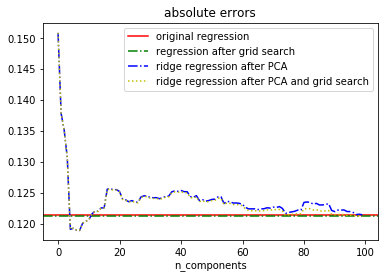

original_regression: 0.12141481063871318
regression after grid search: 0.12120780944459392
regression after PCA: 0.12141481063871325
regression after PCA and grid search: 0.12120780944459392


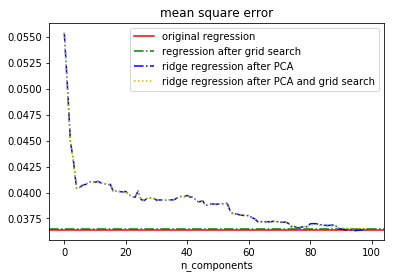

original_regression: 0.036432099203600486
regression after grid search: 0.036515870276682405
regression after PCA: 0.0364320992036004
regression after PCA and grid search: 0.03651587027668236


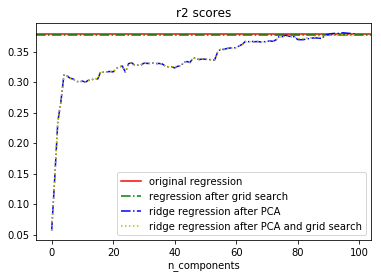

original_regression: 0.3794578989041195
regression after grid search: 0.37803103965533447
regression after PCA: 0.37945789890412085
regression after PCA and grid search: 0.37803103965533513


In [25]:
pca_for_count_of_components = PCA()
pca_for_count_of_components.fit(X_scaled_train)
total_components = len(pca.explained_variance_)
pca_results_n_components_lasso = []
pca_results_n_components_lasso_cv = []

for i in range(total_components):
    pca_n = PCA(n_components=i+1)
    pca_n.fit(X_scaled_train)
    X_pca_n_train = pca_n.transform(X_scaled_train)
    X_pca_n_test = pca_n.transform(X_scaled_test)
    clf_pca = linear_model.Ridge(alpha=0.5)
    clf_pca.fit(X_pca_n_train, y_train)
    y_n_hat = clf_pca.predict(X_pca_n_test)
    mae = mean_absolute_error(y_test, y_n_hat)
    mse = mean_squared_error(y_test, y_n_hat)
    r2s = r2_score(y_test, y_n_hat)
    pca_results_n_components_lasso.append((mae,mse,r2s))
    
    ridge_pca_cv_n = RidgeCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1,2,4,5,10], cv = 10) 
    ridge_pca_cv_n.fit(X_pca_n_train, y_train)
    y_n_hat_cv = ridge_pca_cv_n.predict(X_pca_n_test)
    mae_cv = mean_absolute_error(y_test, y_n_hat_cv)
    mse_cv = mean_squared_error(y_test, y_n_hat_cv)
    r2s_cv = r2_score(y_test, y_n_hat_cv)
    pca_results_n_components_lasso_cv.append((mae_cv,mse_cv,r2s_cv))
    
    
maes, mses, r2ss = zip(*pca_results_n_components_lasso)
maes_cv, mses_cv, r2ss_cv = zip(*pca_results_n_components_lasso_cv)

mae_original =  mean_absolute_error(y_test, y_hat)
mse_original =  mean_squared_error(y_test, y_hat)
r2s_original = r2_score(y_test, y_hat)

mae_cv =  mean_absolute_error(y_test, y_hat_cv)
mse_cv =  mean_squared_error(y_test, y_hat_cv)
r2s_cv = r2_score(y_test, y_hat_cv)

plt.title("absolute errors")
plt.xlabel("n_components")
plt.axhline(y=mae_original, color='r', linestyle='-', label="original regression")
plt.axhline(y=mae_cv, color='g', linestyle='-.', label="regression after grid search")
plt.plot(maes, color='b', linestyle='-.', label="ridge regression after PCA")
plt.plot(maes_cv, color='y', linestyle=':',label="ridge regression after PCA and grid search")
plt.legend(loc='best')
plt.show()
print("original_regression: {}".format(mae_original))
print("regression after grid search: {}".format(mae_cv))
print("regression after PCA: {}".format(maes[-1]))
print("regression after PCA and grid search: {}".format(maes_cv[-1]))

plt.title("mean square error")
plt.xlabel("n_components")
plt.axhline(y=mse_original, color='r', linestyle='-', label="original regression")
plt.axhline(y=mse_cv, color='g', linestyle='-.', label="regression after grid search")
plt.plot(mses, color='b', linestyle='-.',label="ridge regression after PCA")
plt.plot(mses_cv, color='y', linestyle=':',label="ridge regression after PCA and grid search")
plt.legend(loc='best')
plt.show()
print("original_regression: {}".format(mse_original))
print("regression after grid search: {}".format(mse_cv))
print("regression after PCA: {}".format(mses[-1]))
print("regression after PCA and grid search: {}".format(mses_cv[-1]))

plt.title("r2 scores")
plt.xlabel("n_components")
plt.axhline(y=r2s_original, color='r', linestyle='-', label="original regression")
plt.axhline(y=r2s_cv, color='g', linestyle='-.', label="regression after grid search")
plt.plot(r2ss, color='b', linestyle='-.',label="ridge regression after PCA")
plt.plot(r2ss_cv, color='y', linestyle=':',label="ridge regression after PCA and grid search")
plt.legend(loc='best')
plt.show()
print("original_regression: {}".format(r2s_original))
print("regression after grid search: {}".format(r2s_cv))
print("regression after PCA: {}".format(r2ss[-1]))
print("regression after PCA and grid search: {}".format(r2ss_cv[-1]))

As we can see ridge regression seems to converge regardless of parameter tuning and dimension reduction. My thoughts to improve the results would be to either select a different algorithm or to add additional features.

#### References
* [1] [Depy 2016 Talk: Pre-Modeling: Data Preprocessing and Feature Exploration in Python Notebook](https://github.com/aprilypchen/depy2016/blob/master/DePy_Talk.ipynb)
* [2] [amclean3695's Communities-and-Crime Notebook](https://github.com/amclean3695/Communities-and-Crime/blob/master/Communities_and_Crime.ipynb)
* [3] [Aurelien Geron's Hands-On Machine Learning with Scikit-Learn and TensorFlow](https://github.com/ageron/handson-ml)